In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_spotify = pd.read_csv('spotify_songs.csv')
df_tiktok = pd.read_csv('TikTok_songs_2022.csv')

In [3]:
features = ['energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']
X_spotify = df_spotify[features]

In [4]:
scaler = StandardScaler()
X_spotify_scaled = scaler.fit_transform(X_spotify)

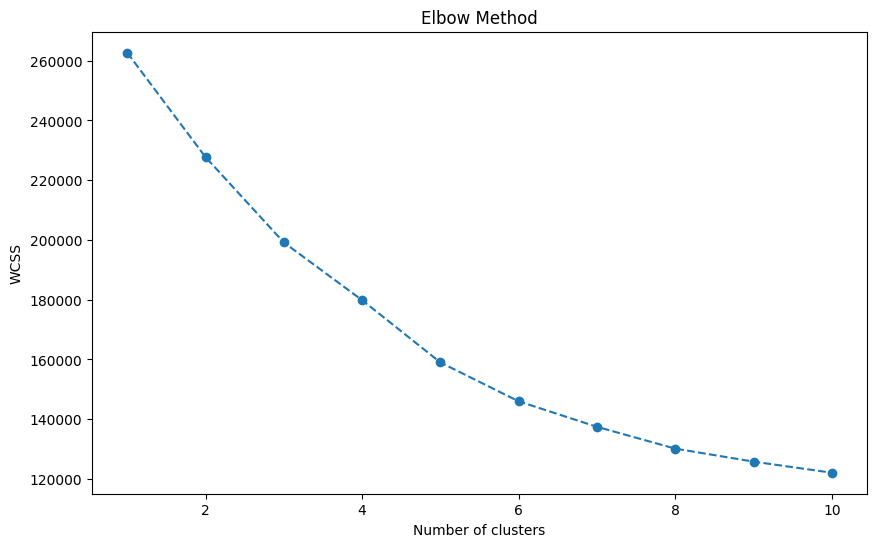

In [5]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_spotify_scaled)
    wcss.append(kmeans.inertia_)

# Plot to determine the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_spotify_scaled)
spotify_cluster_labels = kmeans.labels_

In [7]:
df_spotify['cluster'] = spotify_cluster_labels

In [8]:
cluster_to_genre = df_spotify.groupby('cluster')['playlist_genre'].agg(lambda x: x.value_counts().index[0])
print(cluster_to_genre)

cluster
0    latin
1     rock
2      edm
3      r&b
4      edm
5      rap
6      pop
Name: playlist_genre, dtype: object


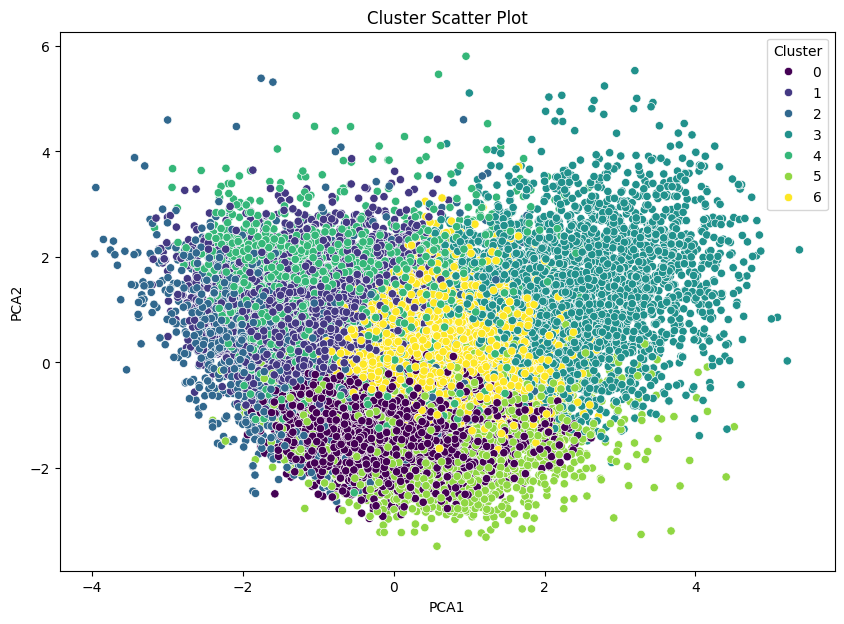

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
spotify_pca = pca.fit_transform(X_spotify_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=spotify_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df_spotify['cluster']

# Plot the scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Cluster Scatter Plot')
plt.show()

In [16]:
X_tiktok = df_tiktok[features]
X_tiktok_scaled = scaler.transform(X_tiktok)

In [17]:
tiktok_cluster_labels = kmeans.predict(X_tiktok_scaled)

In [18]:
tiktok_genres = [cluster_to_genre[cluster] for cluster in tiktok_cluster_labels]

In [19]:
df_tiktok['predicted_genre'] = tiktok_genres
df_tiktok['cluster'] = tiktok_cluster_labels

In [20]:
df_spotify.to_csv('spotify_dataset_with_clusters.csv', index=False)
df_tiktok.to_csv('tiktok_predicted_genres_with_clusters.csv', index=False)
print("CSV files have been created and saved")

CSV files have been created and saved


In [21]:
print("Spotify Dataset with Clusters:")
print(df_spotify.head())
print("\nTikTok Dataset with Predicted Genres and Clusters:")
print(df_tiktok.head())

Spotify Dataset with Clusters:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care 